In [3]:
## calcular ruido blanco para series de tiempo en python

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Configuración de estilo para gráficos

sns.set(style="whitegrid")
def generar_ruido_blanco(tamano):
    """Genera una serie de tiempo de ruido blanco."""
    return np.random.normal(loc=0, scale=1, size=tamano)

def graficar_serie(serie, titulo):
    """Grafica una serie de tiempo."""
    plt.figure(figsize=(10, 5))
    plt.plot(serie, color='blue')
    plt.title(titulo)
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.grid()
    plt.show()


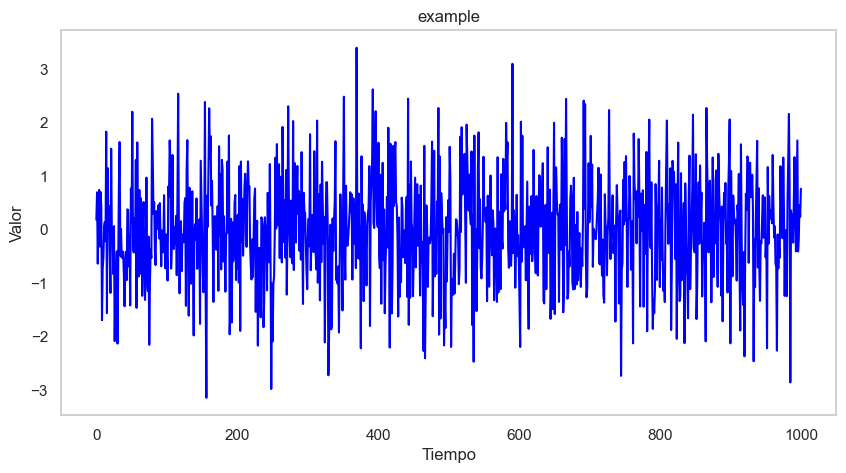

In [4]:
graficar_serie(generar_ruido_blanco(1000),'example')

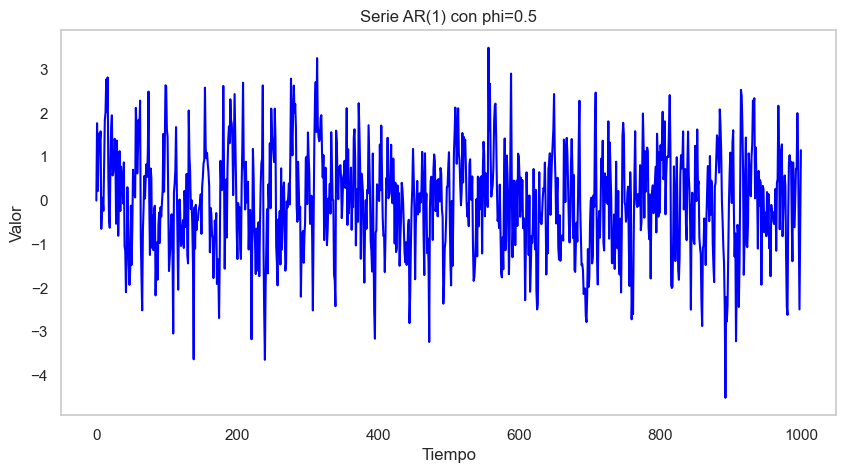

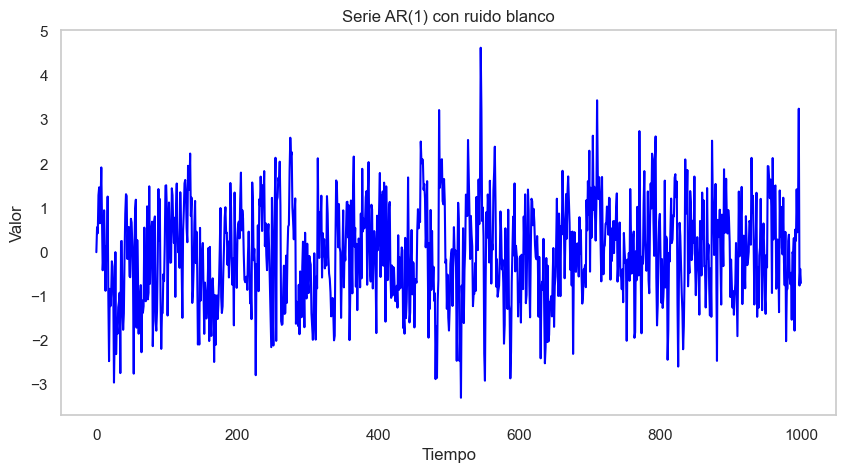

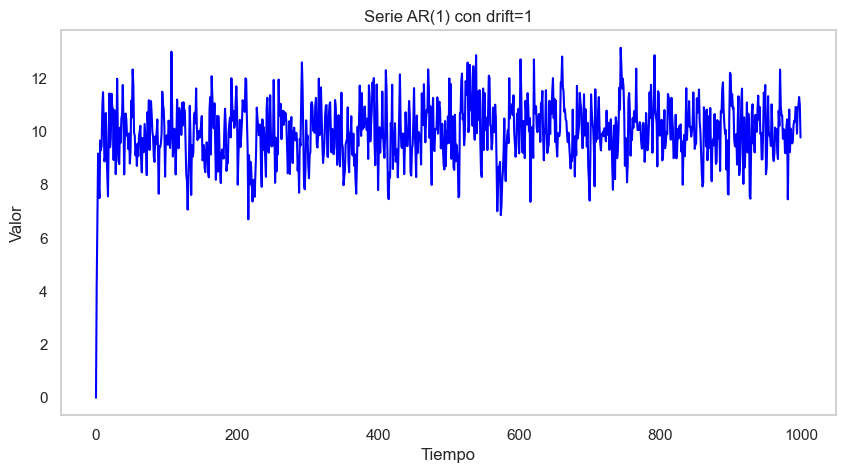

In [5]:
## con este ruido blaco cacular el ar(1)
def ar1(serie, phi=0.5):
    """Genera una serie AR(1) a partir de ruido blanco."""
    n = len(serie)
    ar_serie = np.zeros(n)
    for t in range(1, n):
        ar_serie[t] = phi * ar_serie[t-1] + serie[t]
    return ar_serie

# Generar ruido blanco
ruido_blanco = generar_ruido_blanco(1000)
# Generar serie AR(1)
serie_ar1 = ar1(ruido_blanco, phi=0.5)
graficar_serie(serie_ar1, 'Serie AR(1) con phi=0.5')
def ar1_con_ruido_blanco(tamano, phi=0.5):
    """Genera una serie AR(1) con ruido blanco."""
    ruido = generar_ruido_blanco(tamano)
    return ar1(ruido, phi)

graficar_serie(ar1_con_ruido_blanco(1000, phi=0.5), 'Serie AR(1) con ruido blanco')

## gerar un AR(1) con drift
def ar1_con_drift(tamano, phi=0.5, drift=0):
    """Genera una serie AR(1) con drift."""
    ruido = generar_ruido_blanco(tamano)
    ar_serie = np.zeros(tamano)
    for t in range(1, tamano):
        ar_serie[t] = drift + phi * ar_serie[t-1] + ruido[t]
    return ar_serie

graficar_serie(ar1_con_drift(1000, phi=0.5, drift=5), 'Serie AR(1) con drift=1')

## al sumarle una constante lo que cambia es eque la esperana de Ut es la constante (el drift) y no cero

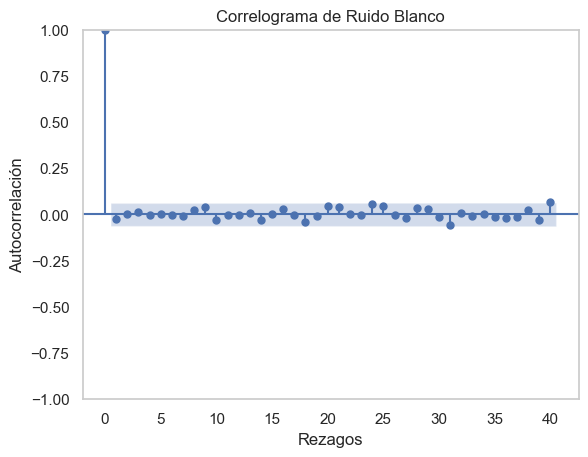

In [6]:
## quiero lso corralelogramas de estas series
def graficar_correlacion(serie, titulo):
    """Grafica el correlograma de una serie de tiempo."""
    sm.graphics.tsa.plot_acf(serie, lags=40)
    plt.title(titulo)
    plt.xlabel('Rezagos')
    plt.ylabel('Autocorrelación')
    plt.grid()
    plt.show()


graficar_correlacion(generar_ruido_blanco(1000), 'Correlograma de Ruido Blanco')

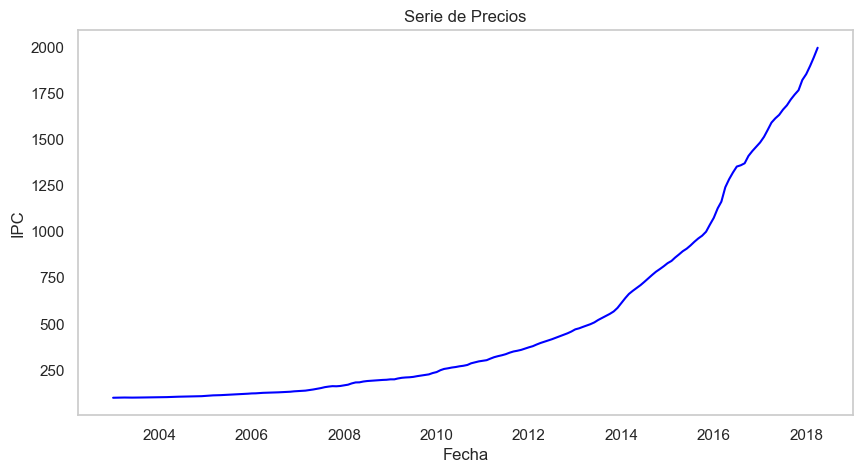

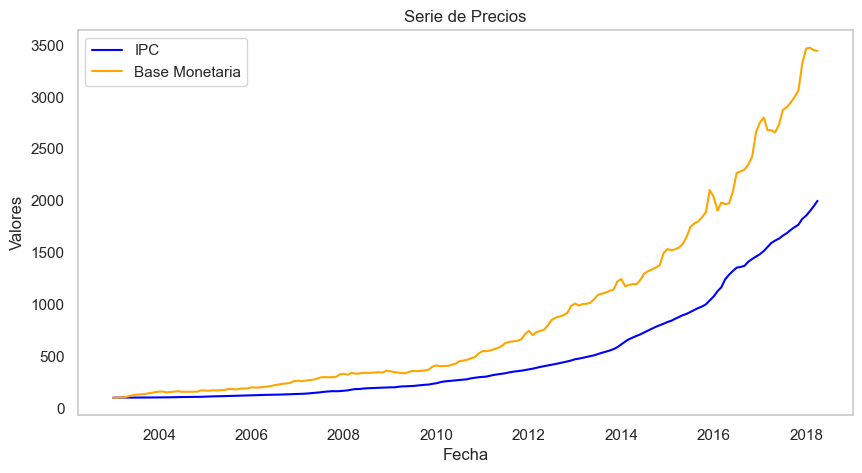

In [7]:
## cargar el dataframe desde el excel Precios_y_Dinero.xls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_excel('./Precios_y_Dinero.xlsx', sheet_name='precios_y_dinero')
df['MMYY'] = pd.to_datetime(df['MMYY'])
df.set_index('MMYY', inplace=True)
def graficar_serie(df, titulo,col='IPC'):
    """Grafica una serie de tiempo."""
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['IPC'], color='blue')
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('IPC')
    plt.grid()
    plt.show()
graficar_serie(df, 'Serie de Precios')

#agregar al grafico de arriba la base monetaria que es la columna M
def graficar_serie_con_base(df, titulo):
    """Grafica una serie de tiempo con base monetaria."""
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['IPC'], color='blue', label='IPC')
    plt.plot(df.index, df['M '], color='orange', label='Base Monetaria')
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid()
    plt.show()

graficar_serie_con_base(df, 'Serie de Precios')


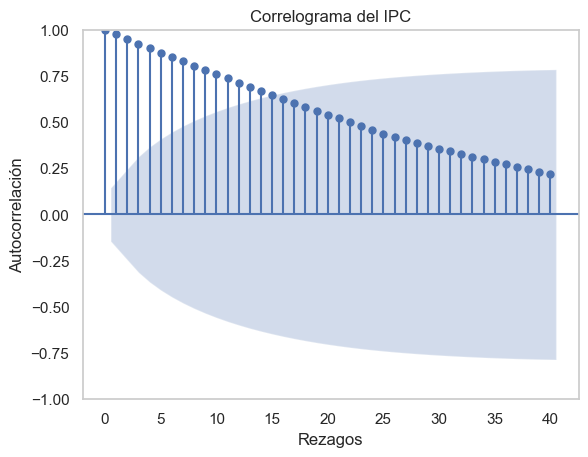

In [8]:
## mostra rla funcion de autocorrelacion
def graficar_autocorrelacion(df, titulo,column='IPC'):
    """Grafica el correlograma de una serie de tiempo."""
    sm.graphics.tsa.plot_acf(df[column], lags=40)
    plt.title(titulo)
    plt.xlabel('Rezagos')
    plt.ylabel('Autocorrelación')
    plt.grid()
    plt.show()

graficar_autocorrelacion(df, 'Correlograma del IPC')

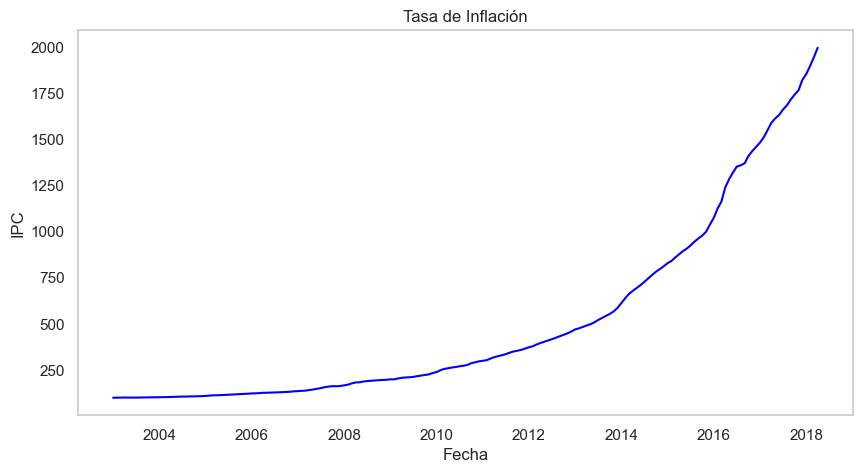

In [9]:
# ahora quiero un grafico de la tasa de inflacion (IPC)

# TRANSOFRMAR IPC	M 	M_en_ARS A NUMEROS
df['IPC'] = pd.to_numeric(df['IPC'], errors='coerce')
df['M '] = pd.to_numeric(df['M '], errors='coerce')
df['M_en_ARS'] = pd.to_numeric(df['M '], errors='coerce')

def calcular_inflacion(df):
    """Calcula la tasa de inflación a partir del IPC."""
    df['Inflacion'] = df['IPC'].pct_change() * 100
    return df


calcular_inflacion(df)

graficar_serie(df, 'Tasa de Inflación','Inflacion')

def calcular_base_monetaria(df):
    """Calcula la tasa de crecimiento de la base monetaria."""
    df['Base Monetaria Crecimiento'] = df['M '].pct_change() * 100
    return df


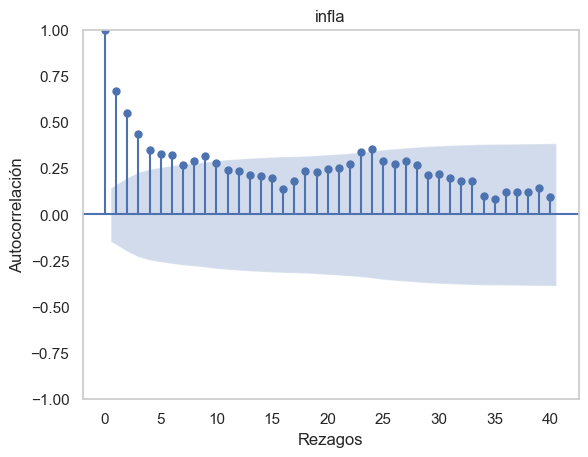

In [10]:
## quiero calcular el correlograma para la columna inflacióny graficarlo
def graficar_autocorrelacion_inflacion(df, titulo):
    """Grafica el correlograma de la tasa de inflación."""
    sm.graphics.tsa.plot_acf(df['Inflacion'].dropna(), lags=40)
    plt.title(titulo)
    plt.xlabel('Rezagos')
    plt.ylabel('Autocorrelación')
    plt.grid()
    plt.show()

graficar_autocorrelacion_inflacion(df,'infla')

### Aca lo que se testea es la autocorrelacion. Si se escapa significa que hay autocorrelacion, esto es, hata el rezago que esta fuero del intervalo de confianza

### Prueba de Dickey Fuller
H0: la Serie es NO estacionaria
H1: la Serie es estacionaria. 

Por lo tanto lo que se busca es rechazar la hipotesis nula.
Si el p-valor es menor a 0.05, se rechaza la hipotesis nula y se concluye que la serie es estacionaria.
Si el p-valor es mayor a 0.05, no se rechaza la hipotesis nula y se concluye que la serie es NO estacionaria.

In [13]:
from statsmodels.tsa.stattools import adfuller
addfuller_result = adfuller(df['Inflacion'].dropna())
addfuller_result

print(f'Estadístico ADF: {addfuller_result[0]}')
print(f'Valor p: {addfuller_result[1]}')
print(f'Número de rezagos: {addfuller_result[2]}')
print(f'Número de observaciones: {addfuller_result[3]}')
print(f'Valores críticos:')




Estadístico ADF: -4.45797059204743
Valor p: 0.00023403966364146048
Número de rezagos: 1
Número de observaciones: 181
Valores críticos:
